In [ ]:
import scanpy as sc 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors, cm
import numpy as np
import scipy
import os

from utils import plot_histogram
from var import *

import pertpy as pt

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

In [ ]:
#set seed to 0 for reproducibility of results
np.random.seed(0)

In [ ]:
#Create figures folder
figures_folder = os.path.join(results_folder, 'figures/perturbed_rna_exploration/')
if not os.path.exists(figures_folder):
    os.makedirs(figures_folder)

<h3> 1. Data exploration of filtered data </h3>

In [ ]:
#load log normlised adata object with filter for cells with more than 5000 UMI counts expressed
adata_preprocessed = sc.read_h5ad(f'/lustre/scratch123/hgi/teams/parts/kl11/cell2state_tf_activation/results/20230116_adata_pre_processed.h5ad')

In [ ]:
#load adata obs object from crispra csv file
adata_obs_df=pd.read_csv('/lustre/scratch123/hgi/teams/parts/kl11/cell2state_tf_activation/data/crispra_data_exploration/20230202_perturbation_state.csv', index_col=0)
#order index of adata_obs_df to match adata_preprocessed
adata_obs_df = adata_obs_df.reindex(adata_preprocessed.obs.index)
#check that the index of adata_obs_df matches adata_preprocessed
assert adata_obs_df.index.equals(adata_preprocessed.obs.index)
#overwrite adata_preprocessed.obs with adata_obs_df
adata_preprocessed.obs = adata_obs_df

#filter out cells that are not in the perturbation state
adata_pertubed = adata_preprocessed[adata_preprocessed.obs['perturbation_state'] != 'not_perturbed']

#### 1.1 Cell cycle score

In [ ]:
cell_cycle_genes = [x.strip() for x in open('/lustre/scratch123/hgi/teams/parts/kl11/cell2state_tf_activation/data/regev_lab_cell_cycle_genes.txt')]

In [ ]:
s_genes = cell_cycle_genes[:43]
s_genes = [x for x in s_genes if adata_preprocessed.var['SYMBOL'].isin([x]).any()]
g2m_genes = cell_cycle_genes[43:]
g2m_genes = [x for x in g2m_genes if adata_preprocessed.var['SYMBOL'].isin([x]).any()]

#extract ESNG cell cycle genes from adata_preprocessed
s_genes_ENSG = adata_preprocessed[:, adata_preprocessed.var['SYMBOL'].isin(s_genes)].var_names.to_list()
g2m_genes_ENSG = adata_preprocessed[:, adata_preprocessed.var['SYMBOL'].isin(g2m_genes)].var_names.to_list()


In [ ]:
#filter adatapreprocessed for genes in s_genes_ENSG and g2m_genes_ENSG
adata_cell_cycle = adata_preprocessed[:, adata_preprocessed.var_names.isin(s_genes_ENSG)]

In [ ]:
sc.pp.normalize_per_cell(adata_preprocessed, counts_per_cell_after=1e4)

In [ ]:
sc.tl.score_genes_cell_cycle(adata_preprocessed, s_genes=s_genes_ENSG, g2m_genes=g2m_genes_ENSG)

/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [ ]:
adata_preprocessed.obs

,barcodes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,mt_frac,sample,barcode,perturbation_state,S_score,G2M_score,phase
cellranger710_count_05e682d5679826b9b76d6bec731bbe61_11989,TGGTTAGTCCCTCAGT-1,6246,8.739857,29366.0,10.287627,44.732003,50.371178,55.635769,63.920861,0.022305,cellranger710_count_05e682d5679826b9b76d6bec73...,11989,LHX6,-0.477595,0.045985,G2M
cellranger710_count_05e682d5679826b9b76d6bec731bbe61_7790,GCATGCGAGATCGATA-1,4974,8.512181,16698.0,9.723104,21.218110,31.117499,40.777339,54.419691,0.021200,cellranger710_count_05e682d5679826b9b76d6bec73...,7790,DLX1,0.080158,-0.350220,S
cellranger710_count_05e682d5679826b9b76d6bec731bbe61_430,AAGACCTCAGGACGTA-1,2680,7.893945,5298.0,8.575273,29.275198,33.993960,40.656852,53.926010,0.228577,cellranger710_count_05e682d5679826b9b76d6bec73...,430,not_perturbed,-0.330342,-0.421761,G1
cellranger710_count_05e682d5679826b9b76d6bec731bbe61_9159,GTACTTTGTCTCCATC-1,6321,8.751791,21840.0,9.991545,18.031136,26.304945,35.439560,48.690476,0.032509,cellranger710_count_05e682d5679826b9b76d6bec73...,9159,AIRE,-0.116849,-0.037562,G1
cellranger710_count_05e682d5679826b9b76d6bec731bbe61_2306,ATAACGCCAGCCTTTC-1,6198,8.732143,22869.0,10.037581,22.217849,30.670340,39.608203,52.328480,0.032008,cellranger710_count_05e682d5679826b9b76d6bec73...,2306,IRF3,0.197230,-0.345979,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cellranger710_count_05e682d5679826b9b76d6bec731bbe61_6511,CTGCTGTTCTTCAACT-1,7424,8.912608,28448.0,10.255868,18.008296,26.240861,34.540214,46.548088,0.028754,cellranger710_count_05e682d5679826b9b76d6bec73...,6511,DLX1,-0.136984,-0.094328,G1
cellranger710_count_05e682d5679826b9b76d6bec731bbe61_9762,GTTACAGCAAGAAGAG-1,5271,8.570165,17739.0,9.783577,19.476859,28.502170,37.685326,51.355770,0.033880,cellranger710_count_05e682d5679826b9b76d6bec73...,9762,PROX1,-0.130665,-0.101824,G1
cellranger710_count_05e682d5679826b9b76d6bec731bbe61_912,ACCCACTGTGTTGAGG-1,7453,8.916506,36751.0,10.511948,30.521618,38.004408,45.304890,55.878752,0.028734,cellranger710_count_05e682d5679826b9b76d6bec73...,912,OLIG2,0.215337,0.412142,G2M
cellranger710_count_05e682d5679826b9b76d6bec731bbe61_11759,TGCTACCGTCCATGAT-1,6965,8.848796,27663.0,10.227887,18.432563,26.956585,35.954163,48.837798,0.025160,cellranger710_count_05e682d5679826b9b76d6bec73...,11759,RORA,-0.305146,0.711261,G2M


In [1]:
sc.pl.umap(adata_preprocessed, color=[ 'phase'])

NameError: name 'sc' is not defined

In [ ]:
#plot umap of cell cycle genes
ms = pt.tl.Mixscape()
ms.pert_sign(
    adata_preprocessed,
    pert_key="perturbation_state",
    control="non_activating",
    n_neighbors=20
)

In [ ]:
adata_preprocessed.X = adata_preprocessed.layers['X_pert']

In [ ]:
sc.pp.pca(adata_preprocessed)

In [ ]:
sc.pp.neighbors(adata_preprocessed)

In [ ]:
sc.tl.umap(adata_preprocessed)

<AxesSubplot: title={'center': 'phase'}, xlabel='UMAP1', ylabel='UMAP2'>

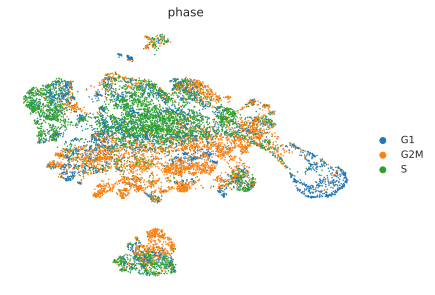

In [ ]:
#plot umap of cell cycle genes
sc.pl.umap(adata_preprocessed, color='phase', ncols=2, frameon=False, show=False)

/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/scanpy/tools/_leiden.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_added] = pd.Categorical(
/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<AxesSubplot: title={'center': 'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>

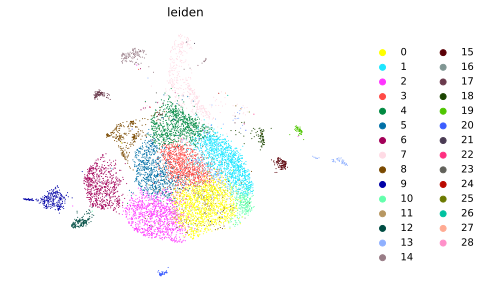

In [ ]:
# Leiden clustering with resolution 2
sc.tl.leiden(adata_pertubed, resolution=1)
# Plot UMAP
sc.pl.umap(adata_pertubed, color=['leiden'],
           color_map = 'RdPu', ncols = 3, #legend_loc='on data',
           size=5,
           legend_fontsize=10,
           frameon=False,
           show=False
           )
# plt.savefig(f'{figures_folder}{today}_perturbed_leiden_res_1.pdf')